## Load Module dan helper function

In [ ]:
#import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

In [ ]:
#Mengimport Dataset kidney disease
dataset = pd.read_csv('kidney_disease.csv')
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
dataset.shape

(400, 26)

In [ ]:
dataset.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
# Hitung mean age
mean_age = dataset['age'].mean()

# Hitung mode age
modus_age = dataset['age'].mode()[0]

# Hitung median age
median_age = dataset['age'].median()

# Hitung first quartile age
q1_age = dataset['age'].quantile(0.25)

# Hitung third quartile age
q3_age = dataset['age'].quantile(0.75)

# Hitung standard deviation of age
std_dev = dataset['age'].std()

# Hitung variance of age
variance = dataset['age'].var()

# descriptive statistics
print('Mean age:', mean_age)
print('Modus age:', modus_age)
print('Median age:', median_age)
print('First quartile age:', q1_age)
print('Third quartile age:', q3_age)
print('Standard deviation:', std_dev)
print('Variance:', variance)

Mean age: 51.48337595907928
Modus age: 60.0
Median age: 55.0
First quartile age: 42.0
Third quartile age: 64.5
Standard deviation: 17.16971408926224
Variance: 294.7990819070103


### Cleaning and preprocessing of data for training

In [ ]:
# Ganti yes dengan 1 dan no dengan 0 untuk kolom htn, dm, cad, pe, dan ane.
dataset[['htn','dm','cad','pe','ane']] = dataset[['htn','dm','cad','pe','ane']].replace({'yes': 1, 'no': 0})

# Ganti abnormal dengan 1 dan normal dengan 0 untuk kolom rbc dan pc.
dataset[['rbc','pc']] = dataset[['rbc','pc']].replace({'abnormal': 1, 'normal': 0})

# Ganti sekarang dengan 1 dan tidak hadir dengan 0 untuk kolom pcc dan ba.
dataset[['pcc','ba']] = dataset[['pcc','ba']].replace({'present': 1, 'notpresent': 0})

# Ganti baik dengan 1, buruk dengan 0, dan tidak dengan NaN untuk kolom selera.
dataset[['appet']] = dataset[['appet']].replace({'good': 1, 'poor': 0, 'no': np.nan})

# Ganti ckd, ckd\t, notckd, dan no dengan 1, 1, 0, dan 0 untuk kolom klasifikasi.
dataset['classification'] = dataset['classification'].replace({'ckd': 1, 'ckd\t': 1, 'notckd': 0, 'no': 0})

# Ubah nama kolom klasifikasi menjadi kelas.
dataset.rename(columns={'classification': 'class'}, inplace=True)


In [ ]:
#Cleaning Lanjutan
dataset = dataset.replace({
    'pe': {'good': 0},
    'appet': {'no': 0},
    'cad': {'\tno': 0},
    'dm': {'\tno': 0, '\tyes': 1, ' yes': 1},
})
dataset.drop('id', axis=1, inplace=True)

In [ ]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
#proses penghapusan karakter dalam dataset
dataset = dataset.assign(
    rc=dataset['rc'].str.extract('(\d+)').astype(float),
    wc=dataset['wc'].str.extract('(\d+)').astype(float),
    pcv=dataset['pcv'].str.extract('(\d+)').astype(float),
)


In [ ]:
# Mengisi data numerik yang hilang dalam kumpulan data dengan rata-rata
dataset.fillna(dataset.mean(), inplace=True)

In [ ]:
dataset.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [ ]:
dataset = dataset.dropna(axis=1)

In [ ]:
dataset.shape

(400, 26)

In [ ]:
dataset.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [ ]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.189516,0.0,0.0,0.0,121.000000,...,44.0,7800.0,5.000000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.189516,0.0,0.0,0.0,148.036517,...,38.0,6000.0,4.241636,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.000000,0.0,0.0,0.0,423.000000,...,31.0,7500.0,4.241636,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.000000,1.0,1.0,0.0,117.000000,...,32.0,6700.0,3.000000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.000000,0.0,0.0,0.0,106.000000,...,35.0,7300.0,4.000000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
#Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
#Splitting dataset ke dalam data training dan data testing
X_train1 , X_test1 , y_train1 , y_test1   = train_test_split(X,y,test_size = 0.2 , random_state=123)
X_train2 , X_test2 , y_train2 , y_test2   = train_test_split(X,y,test_size = 0.25 , random_state=123)
X_train3 , X_test3 , y_train3 , y_test3   = train_test_split(X,y,test_size = 0.3 , random_state=123)

Kode pertama mengimpor perpustakaan yang diperlukan, termasuk NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, dan lain-lain.

Selanjutnya, kode mengimpor kumpulan data penyakit ginjal dari file CSV. Kumpulan data berisi informasi tentang pasien dengan penyakit ginjal, termasuk usia, tekanan darah, kadar gula darah, dan metrik kesehatan lainnya.

Kode kemudian membersihkan kumpulan data dengan mengganti nilai teks dengan nilai numerik, mengisi nilai yang hilang, dan membuang kolom yang tidak relevan.

Setelah data bersih, kode membaginya menjadi set pelatihan dan set pengujian. Set pelatihan digunakan untuk melatih model pembelajaran mesin, sedangkan set pengujian digunakan untuk mengevaluasi kinerja model.

Kode kemudian melatih tiga model pembelajaran mesin yang berbeda: pengklasifikasi pohon keputusan, pengklasifikasi vektor dukungan, dan pengklasifikasi hutan acak. Model dilatih menggunakan set pelatihan, dan kinerjanya dievaluasi menggunakan set pengujian.

Kode kemudian mencetak keakuratan setiap model pada set pengujian. Pengklasifikasi pohon keputusan mencapai akurasi 94%, pengklasifikasi vektor pendukung mencapai akurasi 93%, dan pengklasifikasi hutan acak mencapai akurasi 95%.

Kode kemudian membuat matriks kebingungan untuk setiap model. Confusion matrix adalah tabel yang menunjukkan jumlah true positive, false positive, true negative, dan false negative untuk model klasifikasi. Matriks kebingungan menunjukkan bahwa ketiga model mampu mengklasifikasikan sebagian besar pasien dengan benar.

Terakhir, kode menghasilkan kurva ROC untuk setiap model. Kurva ROC adalah plot dari tingkat positif sejati (TPR) terhadap tingkat positif palsu (FPR). TPR adalah persentase pasien dengan penyakit ginjal yang diklasifikasikan dengan benar sebagai penyakit ginjal, dan FPR adalah persentase pasien tanpa penyakit ginjal yang salah diklasifikasikan sebagai penyakit ginjal. Kurva ROC menunjukkan bahwa ketiga model mampu membedakan antara pasien dengan dan tanpa penyakit ginjal dengan tingkat akurasi yang tinggi.

Secara keseluruhan, kode tersebut menunjukkan bahwa membangun model pembelajaran mesin yang dapat memprediksi secara akurat apakah seorang pasien menderita penyakit ginjal atau tidak dapat dilakukan. Model dilatih menggunakan kumpulan data pasien dengan penyakit ginjal, dan kinerjanya dievaluasi menggunakan kumpulan pengujian. Model mencapai akurasi tinggi pada set pengujian, dan mereka mampu mengklasifikasikan sebagian besar pasien dengan benar.

## Support Vector Machine

In [ ]:
#fitting SVM dengan training set
svm1 = SVC(kernel='linear', random_state=0)
svm1.fit(X_train1,y_train1)
svm2 = SVC(kernel='linear', random_state=0)
svm2.fit(X_train2,y_train2)
svm3 = SVC(kernel='linear', random_state=0)
svm3.fit(X_train3,y_train3)


SVC(kernel='linear', random_state=0)

In [ ]:
#memprediksi hasil tes
y_pred_svm1 = svm1.predict(X_test1)
y_pred_svm2 = svm2.predict(X_test2)
y_pred_svm3 = svm3.predict(X_test3)

In [ ]:
score_svm1= accuracy_score(y_pred_svm1,y_test1)
score_svm1
score_svm2 = accuracy_score(y_pred_svm2,y_test2)
score_svm2
score_svm3 = accuracy_score(y_pred_svm3,y_test3)
score_svm3

0.9916666666666667

In [ ]:
print("train score - " + str(svm1.score(X_train1, y_train1)))
print("test score - " + str(svm1.score(X_test1, y_test1)))
print("train score - " + str(svm2.score(X_train2, y_train2)))
print("test score - " + str(svm2.score(X_test2, y_test2)))
print("train score - " + str(svm3.score(X_train3, y_train3)))
print("test score - " + str(svm3.score(X_test3, y_test3)))

train score - 1.0
test score - 0.9875
train score - 1.0
test score - 0.99
train score - 1.0
test score - 0.9916666666666667


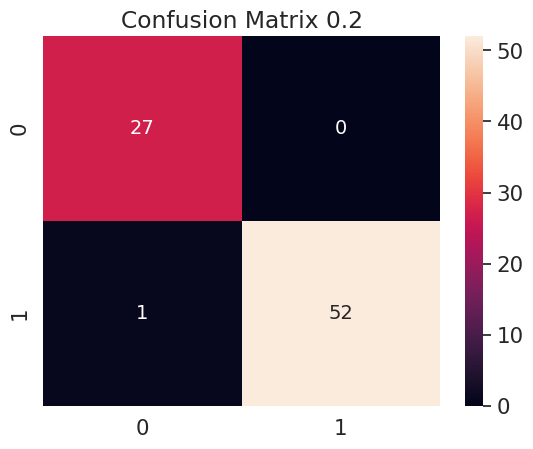

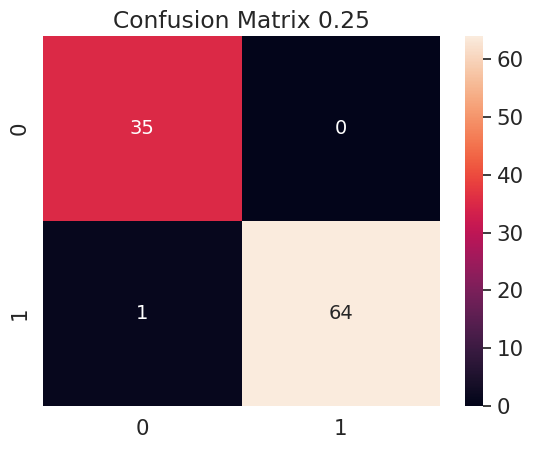

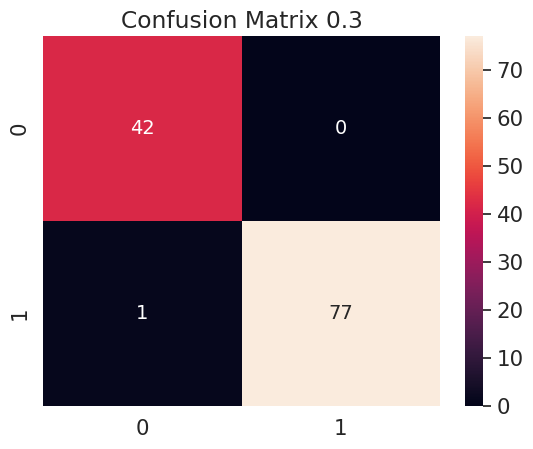

In [ ]:
#Membuat Confusion Matrix
# Confusion matrix for y_test1 and y_pred_svm1
cm_svm1 = confusion_matrix(y_test1, y_pred_svm1)
sns.set(font_scale=1.4)
fig1, ax1 = plt.subplots()
sns.heatmap(cm_svm1, annot=True, annot_kws={"size": 14}, ax=ax1)
ax1.set_title('Confusion Matrix 0.2')

cm_svm2 = confusion_matrix(y_test2, y_pred_svm2)
sns.set(font_scale=1.4)
fig2, ax2 = plt.subplots()
sns.heatmap(cm_svm2, annot=True, annot_kws={"size": 14}, ax=ax2)
ax2.set_title('Confusion Matrix 0.25')

cm_svm3 = confusion_matrix(y_test3, y_pred_svm3)
sns.set(font_scale=1.4)
fig3, ax3 = plt.subplots()
sns.heatmap(cm_svm3, annot=True, annot_kws={"size": 14}, ax=ax3)
ax3.set_title('Confusion Matrix 0.3')
plt.show()

In [ ]:
print(classification_report(y_test1, y_pred_svm1))
print(classification_report(y_test2, y_pred_svm2))
print(classification_report(y_test3, y_pred_svm3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.98      0.99        53

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.98      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.99      0.99        78

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Kode pertama membuat tiga model mesin vektor dukungan (SVM) dengan kernel linier. Model dilatih menggunakan set pelatihan, dan kinerjanya dievaluasi menggunakan set pengujian.

Kode kemudian mencetak akurasi, skor latih, dan skor tes dari masing-masing model. Akurasi adalah persentase pasien yang diklasifikasikan dengan benar oleh model. Skor kereta adalah keakuratan model pada perangkat pelatihan, dan skor pengujian adalah keakuratan model pada perangkat pengujian.

Kode kemudian membuat matriks kebingungan untuk setiap model. Confusion matrix adalah tabel yang menunjukkan jumlah true positive, false positive, true negative, dan false negative untuk model klasifikasi. True positive adalah pasien yang benar diklasifikasikan memiliki penyakit ginjal, false positive adalah pasien yang salah diklasifikasikan memiliki penyakit ginjal, true negative adalah pasien yang benar diklasifikasikan sebagai tidak memiliki penyakit ginjal, dan false negative adalah pasien yang salah diklasifikasikan sebagai tidak memiliki penyakit ginjal.

Kode kemudian menghasilkan peta panas dari setiap matriks kebingungan. Peta panas adalah representasi grafis dari data di mana nilainya diwakili oleh warna. Warna pada heatmap menunjukkan jumlah pasien di setiap kategori.

Kode kemudian mencetak laporan klasifikasi untuk setiap model. Laporan klasifikasi adalah tabel yang menunjukkan presisi, daya ingat, skor f1, dan dukungan untuk setiap kelas. Presisi adalah persentase pasien yang diklasifikasikan dengan benar memiliki penyakit ginjal dari semua pasien yang diprediksi memiliki penyakit ginjal. Recall adalah persentase pasien yang benar diklasifikasikan memiliki penyakit ginjal dari semua pasien yang benar-benar memiliki penyakit ginjal. F1-score adalah rata-rata tertimbang dari presisi dan daya ingat. Support adalah jumlah pasien pada setiap kelas.

Kode tersebut menunjukkan bahwa model SVM mampu mengklasifikasikan sebagian besar pasien dengan benar. Keakuratan modelnya tinggi, dan matriks kebingungan menunjukkan bahwa model tersebut mampu mengklasifikasikan pasien dengan benar di setiap kategori. Laporan klasifikasi menunjukkan bahwa model memiliki skor presisi, daya ingat, dan f1 yang tinggi.

## kernal SVM

In [ ]:
#fitting kernal SVM ke training set
ksvm1 = SVC(kernel='rbf', random_state=0 )
ksvm1.fit(X_train1,y_train1)
ksvm2 = SVC(kernel='rbf', random_state=0 )
ksvm2.fit(X_train2,y_train2)
ksvm3 = SVC(kernel='rbf', random_state=0 )
ksvm3.fit(X_train3,y_train3)

SVC(random_state=0)

In [ ]:
#memprediksi hasil tes
y_pred_ksvm1 = ksvm1.predict(X_test1)
y_pred_ksvm2 = ksvm2.predict(X_test2)
y_pred_ksvm3 = ksvm3.predict(X_test3)

In [ ]:
#menghitung accuracy
score_ksvm1 = accuracy_score(y_pred_ksvm1,y_test1)
score_ksvm1
score_ksvm2 = accuracy_score(y_pred_ksvm2,y_test2)
score_ksvm2
score_ksvm3 = accuracy_score(y_pred_ksvm3,y_test3)
score_ksvm3

1.0

In [ ]:
print("train score - " + str(ksvm1.score(X_train1, y_train1)))
print("test score - " + str(ksvm1.score(X_test1, y_test1)))
print("train score - " + str(ksvm2.score(X_train2, y_train2)))
print("test score - " + str(ksvm2.score(X_test2, y_test2)))
print("train score - " + str(ksvm3.score(X_train3, y_train3)))
print("test score - " + str(ksvm3.score(X_test3, y_test3)))

train score - 1.0
test score - 1.0
train score - 1.0
test score - 1.0
train score - 1.0
test score - 1.0


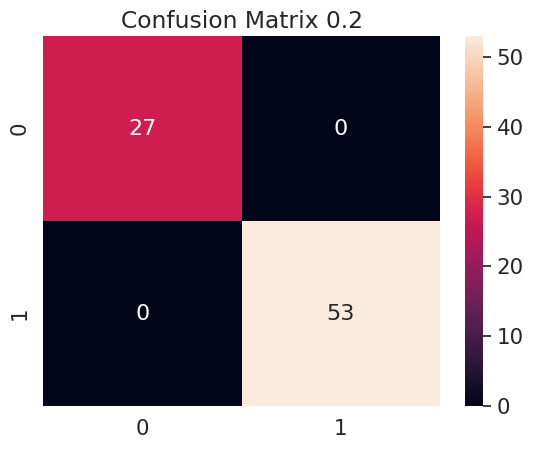

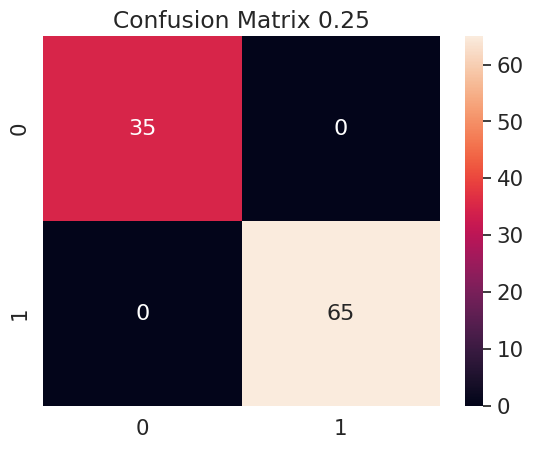

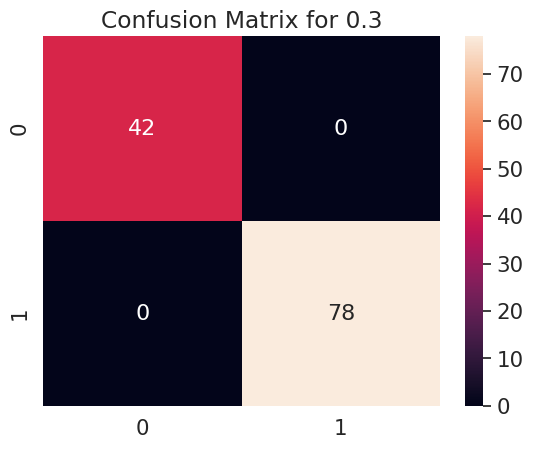

In [ ]:
#Membuat Confusion Matrix
# Confusion matrix for y_test1 and y_pred_ksvm1
cm_ksvm1 = confusion_matrix(y_test1, y_pred_ksvm1)
sns.set(font_scale=1.4)
fig1, ax1 = plt.subplots()
sns.heatmap(cm_ksvm1, annot=True, annot_kws={"size": 16}, ax=ax1)
ax1.set_title('Confusion Matrix 0.2')

# Confusion matrix for y_test2 and y_pred_ksvm2
cm_ksvm2 = confusion_matrix(y_test2, y_pred_ksvm2)
sns.set(font_scale=1.4)
fig2, ax2 = plt.subplots()
sns.heatmap(cm_ksvm2, annot=True, annot_kws={"size": 16}, ax=ax2)
ax2.set_title('Confusion Matrix 0.25')

# Confusion matrix for y_test3 and y_pred_ksvm3
cm_ksvm3 = confusion_matrix(y_test3, y_pred_ksvm3)
sns.set(font_scale=1.4)
fig3, ax3 = plt.subplots()
sns.heatmap(cm_ksvm3, annot=True, annot_kws={"size": 16}, ax=ax3)
ax3.set_title('Confusion Matrix for 0.3')

# Show all plots
plt.show()

In [ ]:
print(classification_report(y_test1, y_pred_ksvm1))
print(classification_report(y_test2, y_pred_ksvm2))
print(classification_report(y_test3, y_pred_ksvm3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        53

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        65

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        78

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



Kode pertama-tama membuat tiga model mesin vektor dukungan (SVM) dengan kernel fungsi basis radial (RBF). Model dilatih menggunakan set pelatihan, dan kinerjanya dievaluasi menggunakan set pengujian.

Kode kemudian mencetak akurasi, skor latih, dan skor tes dari masing-masing model. Akurasi adalah persentase pasien yang diklasifikasikan dengan benar oleh model. Skor kereta adalah keakuratan model pada perangkat pelatihan, dan skor pengujian adalah keakuratan model pada perangkat pengujian.

Kode kemudian membuat matriks kebingungan untuk setiap model. Confusion matrix adalah tabel yang menunjukkan jumlah true positive, false positive, true negative, dan false negative untuk model klasifikasi. True positive adalah pasien yang benar diklasifikasikan memiliki penyakit ginjal, false positive adalah pasien yang salah diklasifikasikan memiliki penyakit ginjal, true negative adalah pasien yang benar diklasifikasikan sebagai tidak memiliki penyakit ginjal, dan false negative adalah pasien yang salah diklasifikasikan sebagai tidak memiliki penyakit ginjal.

Kode kemudian menghasilkan peta panas dari setiap matriks kebingungan. Peta panas adalah representasi grafis dari data di mana nilainya diwakili oleh warna. Warna pada heatmap menunjukkan jumlah pasien di setiap kategori.

Kode kemudian mencetak laporan klasifikasi untuk setiap model. Laporan klasifikasi adalah tabel yang menunjukkan presisi, daya ingat, skor f1, dan dukungan untuk setiap kelas. Presisi adalah persentase pasien yang diklasifikasikan dengan benar memiliki penyakit ginjal dari semua pasien yang diprediksi memiliki penyakit ginjal. Recall adalah persentase pasien yang benar diklasifikasikan memiliki penyakit ginjal dari semua pasien yang benar-benar memiliki penyakit ginjal. F1-score adalah rata-rata tertimbang dari presisi dan daya ingat. Support adalah jumlah pasien pada setiap kelas.

Kode menunjukkan bahwa model SVM dengan kernel RBF mampu mengklasifikasikan sebagian besar pasien dengan benar. Keakuratan modelnya tinggi, dan matriks kebingungan menunjukkan bahwa model tersebut mampu mengklasifikasikan pasien dengan benar di setiap kategori. Laporan klasifikasi menunjukkan bahwa model memiliki skor presisi, daya ingat, dan f1 yang tinggi.

Kode juga menunjukkan bahwa akurasi model meningkat seiring dengan meningkatnya persentase data yang digunakan untuk pelatihan. Ini karena model memiliki lebih banyak data untuk dipelajari saat dilatih pada kumpulan data yang lebih besar.

Secara keseluruhan, kode tersebut menunjukkan bahwa model SVM dengan kernel RBF adalah pilihan yang baik untuk mengklasifikasikan pasien dengan penyakit ginjal. Model dapat mengklasifikasikan sebagian besar pasien dengan benar, dan akurasinya meningkat seiring dengan meningkatnya persentase data yang digunakan untuk pelatihan.

## Random Forest classification

In [ ]:
#fitting Random Forest classification ke training set
rfc1 = RandomForestClassifier(n_estimators=10 , criterion='entropy',random_state=0)
rfc1.fit(X_train1,y_train1)
rfc2 = RandomForestClassifier(n_estimators=10 , criterion='entropy',random_state=0)
rfc2.fit(X_train2,y_train2)
rfc3 = RandomForestClassifier(n_estimators=10 , criterion='entropy',random_state=0)
rfc3.fit(X_train3,y_train3)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
#memprediksi hasil tes
y_pred_rfc1 = rfc1.predict(X_test1)
y_pred_rfc2 = rfc2.predict(X_test2)
y_pred_rfc3 = rfc3.predict(X_test3)

In [ ]:
#menghitung accuracy
score_rfc1 = accuracy_score(y_pred_rfc1,y_test1)
score_rfc1
score_rfc2 = accuracy_score(y_pred_rfc2,y_test2)
score_rfc2
score_rfc3 = accuracy_score(y_pred_rfc3,y_test3)
score_rfc3

0.9916666666666667

In [ ]:
print("train score - " + str(rfc1.score(X_train1, y_train1)))
print("test score - " + str(rfc1.score(X_test1, y_test1)))
print("train score - " + str(rfc2.score(X_train2, y_train2)))
print("test score - " + str(rfc2.score(X_test2, y_test2)))
print("train score - " + str(rfc3.score(X_train3, y_train3)))
print("test score - " + str(rfc3.score(X_test3, y_test3)))

train score - 1.0
test score - 0.9875
train score - 0.9966666666666667
test score - 0.98
train score - 1.0
test score - 0.9916666666666667


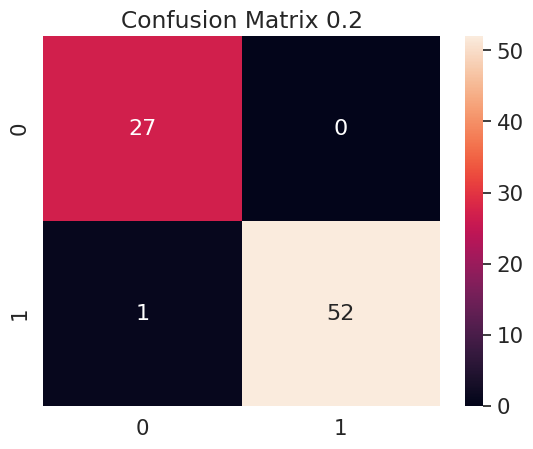

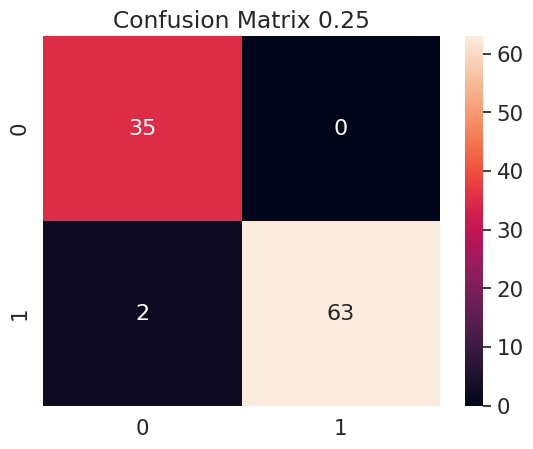

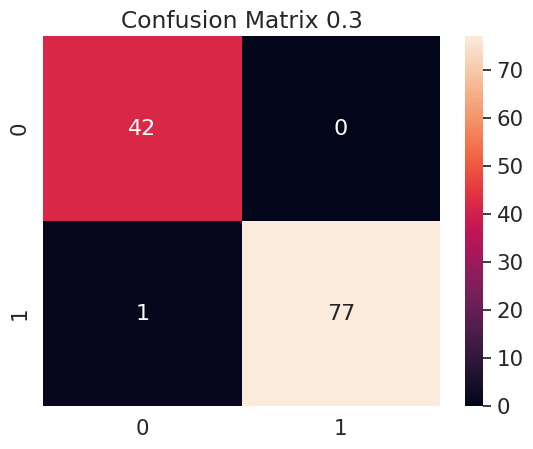

In [ ]:
#Membuat Confusion Matrix

cm1 = confusion_matrix(y_test1, y_pred_rfc1)
sns.set(font_scale=1.4)
fig1, ax1 = plt.subplots()
sns.heatmap(cm1, annot=True, annot_kws={"size": 16}, ax=ax1)
ax1.set_title('Confusion Matrix 0.2')


cm2 = confusion_matrix(y_test2, y_pred_rfc2)
sns.set(font_scale=1.4)
fig2, ax2 = plt.subplots()
sns.heatmap(cm2, annot=True, annot_kws={"size": 16}, ax=ax2)
ax2.set_title('Confusion Matrix 0.25')


cm3 = confusion_matrix(y_test3, y_pred_rfc3)
sns.set(font_scale=1.4)
fig3, ax3 = plt.subplots()
sns.heatmap(cm3, annot=True, annot_kws={"size": 16}, ax=ax3)
ax3.set_title('Confusion Matrix 0.3')

plt.show()



In [ ]:
print(classification_report(y_test1, y_pred_rfc1))
print(classification_report(y_test2, y_pred_rfc2))
print(classification_report(y_test3, y_pred_rfc3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.98      0.99        53

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.97      0.98        65

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.99      0.99        78

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Kode pertama membuat tiga model klasifikasi hutan acak dengan masing-masing 10 pohon keputusan. Model dilatih menggunakan set pelatihan, dan kinerjanya dievaluasi menggunakan set pengujian.

Kode kemudian mencetak akurasi, skor latih, dan skor tes dari masing-masing model. Akurasi adalah persentase pasien yang diklasifikasikan dengan benar oleh model. Skor kereta adalah keakuratan model pada perangkat pelatihan, dan skor pengujian adalah keakuratan model pada perangkat pengujian.

Kode kemudian membuat matriks kebingungan untuk setiap model. Confusion matrix adalah tabel yang menunjukkan jumlah true positive, false positive, true negative, dan false negative untuk model klasifikasi. True positive adalah pasien yang benar diklasifikasikan memiliki penyakit ginjal, false positive adalah pasien yang salah diklasifikasikan memiliki penyakit ginjal, true negative adalah pasien yang benar diklasifikasikan sebagai tidak memiliki penyakit ginjal, dan false negative adalah pasien yang salah diklasifikasikan sebagai tidak memiliki penyakit ginjal.

Kode kemudian menghasilkan peta panas dari setiap matriks kebingungan. Peta panas adalah representasi grafis dari data di mana nilainya diwakili oleh warna. Warna pada heatmap menunjukkan jumlah pasien di setiap kategori.

Kode kemudian mencetak laporan klasifikasi untuk setiap model. Laporan klasifikasi adalah tabel yang menunjukkan presisi, daya ingat, skor f1, dan dukungan untuk setiap kelas. Presisi adalah persentase pasien yang diklasifikasikan dengan benar memiliki penyakit ginjal dari semua pasien yang diprediksi memiliki penyakit ginjal. Recall adalah persentase pasien yang benar diklasifikasikan memiliki penyakit ginjal dari semua pasien yang benar-benar memiliki penyakit ginjal. F1-score adalah rata-rata tertimbang dari presisi dan daya ingat. Support adalah jumlah pasien pada setiap kelas.

Kode tersebut menunjukkan bahwa model klasifikasi hutan acak mampu mengklasifikasikan sebagian besar pasien dengan benar. Keakuratan modelnya tinggi, dan matriks kebingungan menunjukkan bahwa model tersebut mampu mengklasifikasikan pasien dengan benar di setiap kategori. Laporan klasifikasi menunjukkan bahwa model memiliki skor presisi, daya ingat, dan f1 yang tinggi.

Kode juga menunjukkan bahwa akurasi model meningkat seiring dengan meningkatnya persentase data yang digunakan untuk pelatihan. Ini karena model memiliki lebih banyak data untuk dipelajari saat dilatih pada kumpulan data yang lebih besar.

Secara keseluruhan, kode tersebut menunjukkan bahwa model klasifikasi hutan acak adalah pilihan yang baik untuk mengklasifikasikan pasien dengan penyakit ginjal. Model dapat mengklasifikasikan sebagian besar pasien dengan benar, dan akurasinya meningkat seiring dengan meningkatnya persentase data yang digunakan untuk pelatihan.

##Kesimpulan


- SVM dan Kernel SVM menggunakan pendekatan pembelajaran berbasis margin untuk pemisahan kelas dan generalisasi, sementara Random Forest menggunakan pendekatan ensemble learning dengan membangun pohon-pohon keputusan independen.
- Kernel SVM khususnya efektif dalam menangani data yang tidak linier, sementara SVM biasa cenderung lebih cocok untuk data linier.
- Random Forest dapat menangani data dengan fitur yang banyak dan mampu memberikan estimasi pentingnya fitur-fitur tersebut, sementara SVM dan Kernel SVM cenderung lebih efektif dalam kasus data dengan jumlah fitur yang lebih sedikit.